# Genome Size Vs Complexity

### Imports

In [7]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [8]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

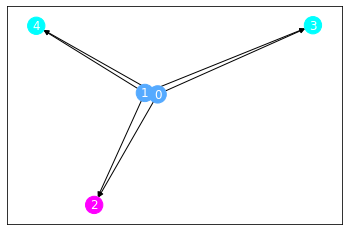

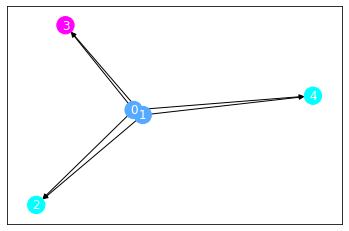

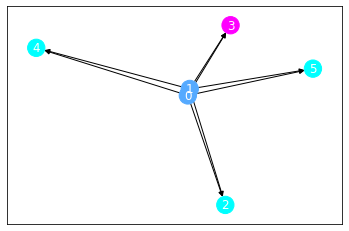

In [9]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [10]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Goal Function

In [11]:
def goal_function(x: [bool]) -> bool:
    return not (x[0] or x[1])

Now the actual simulation

4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:62201.0
Mean:88602.79
STD:78029.40181230342
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:33187.5
Mean:41566.88
STD:30081.032934485476
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:28102.0
Mean:34605.22
STD:24530.02262558272
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:24307.5
Mean:28197.48
STD:19701.362754124395
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:25296.0
Mean:26862.57
STD:16527.44473913315
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:21900.0
Mean:25067.19
STD:18089.419061260647
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:24724.0
Mean:27999.47
STD:18827.262077346775


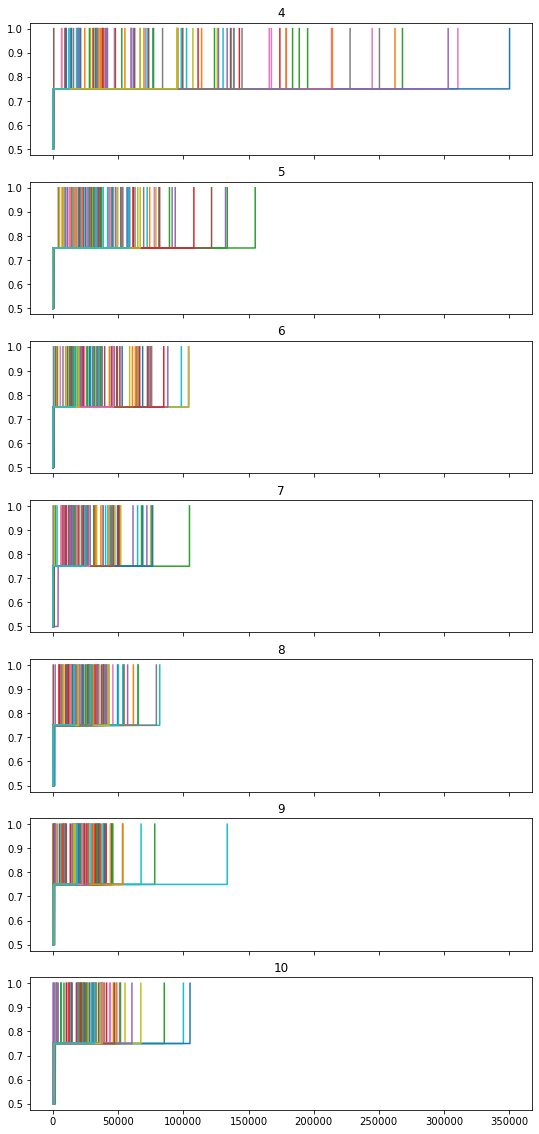

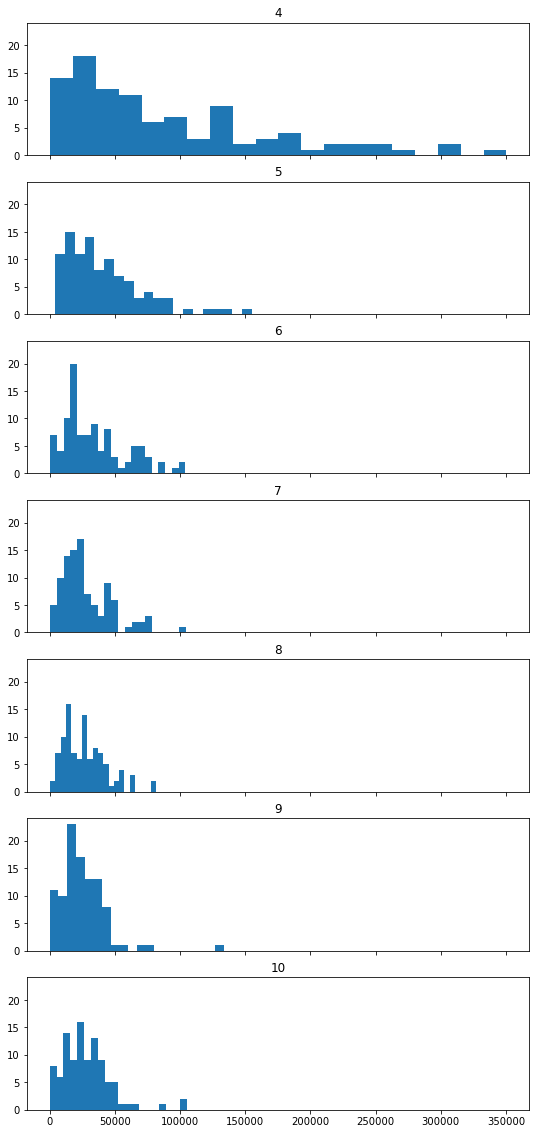

In [12]:
sizes = [4, 5, 6, 7, 8, 9, 10]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_evolution_strong_selection(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

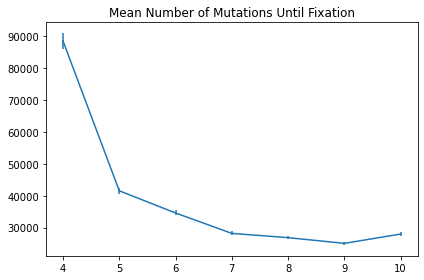

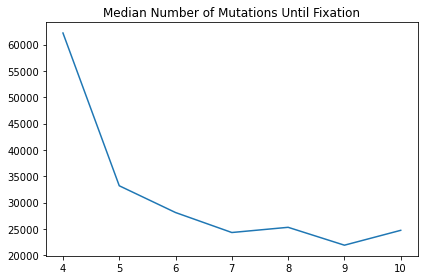

In [13]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 215, 4: 84, 5: 42, 6: 29, 8: 22, 7: 21, 10: 10, 9: 7})


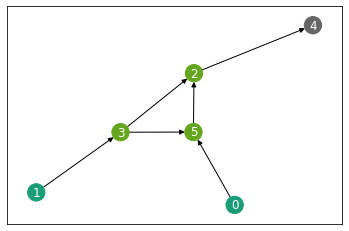

Counter({'total': 54, 4: 16, 5: 13, 6: 8, 8: 7, 10: 6, 7: 4})


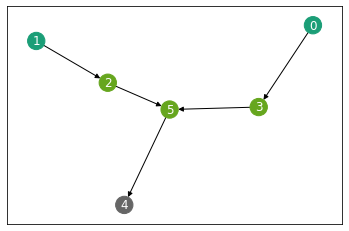

Counter({'total': 19, 10: 7, 5: 5, 7: 3, 6: 2, 8: 2})


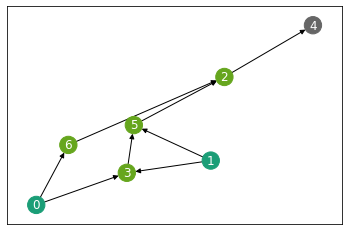

Counter({'total': 26, 6: 9, 5: 5, 7: 5, 8: 4, 9: 2, 10: 1})


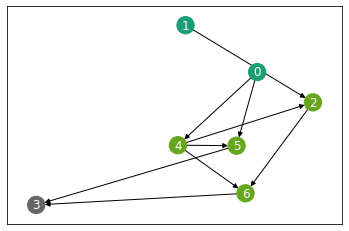

Counter({'total': 16, 5: 5, 8: 4, 10: 3, 6: 2, 9: 2})


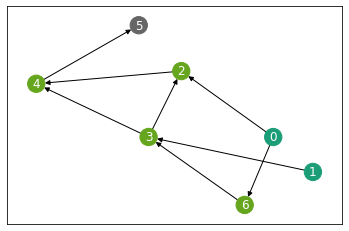

Counter({'total': 9, 5: 3, 10: 3, 6: 1, 7: 1, 9: 1})


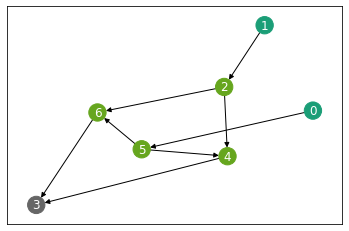

Counter({'total': 41, 7: 10, 5: 9, 6: 7, 9: 7, 8: 5, 10: 3})


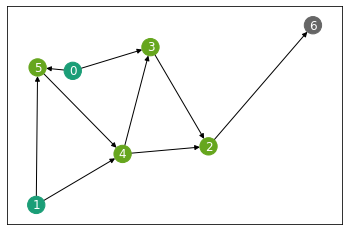

Counter({'total': 17, 5: 6, 6: 4, 7: 4, 9: 3})


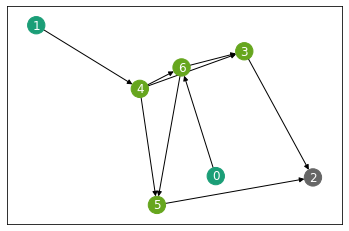

Counter({'total': 17, 5: 4, 10: 4, 8: 3, 9: 3, 7: 2, 6: 1})


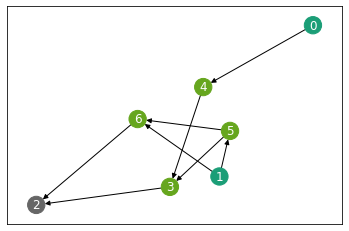

Counter({'total': 39, 6: 10, 7: 8, 5: 7, 9: 7, 10: 5, 8: 2})


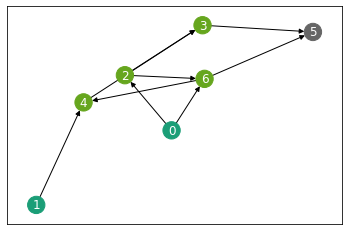

Counter({'total': 15, 6: 6, 7: 3, 8: 2, 9: 2, 5: 1, 10: 1})


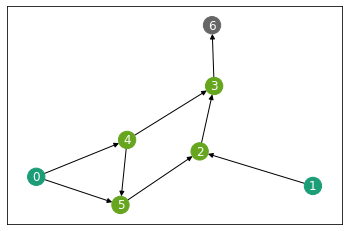

Counter({'total': 6, 6: 3, 7: 1, 9: 1, 10: 1})


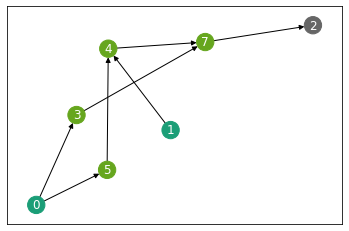

Counter({'total': 5, 9: 2, 10: 2, 6: 1})


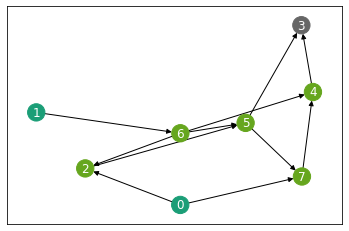

Counter({'total': 5, 9: 2, 6: 1, 7: 1, 8: 1})


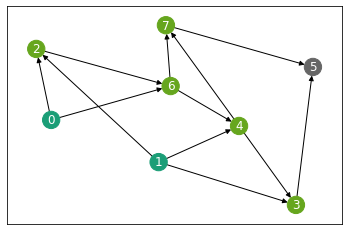

Counter({'total': 5, 7: 2, 8: 2, 9: 1})


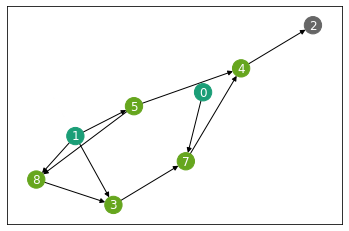

Counter({'total': 5, 8: 3, 10: 2})


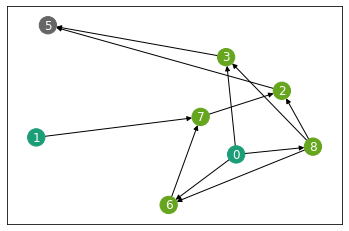

In [14]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [15]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[5, 3, 1, 1, 2, 2, 3, 0, 4],
 [1, 1, 0, 0, 5, 5, 2, 3, 4],
 [5, 6, 1, 0, 2, 2, 1, 3, 0, 0, 4],
 [4, 1, 5, 6, 0, 0, 0, 4, 2, 4, 3],
 [0, 3, 1, 6, 2, 3, 4, 4, 0, 0, 5]]

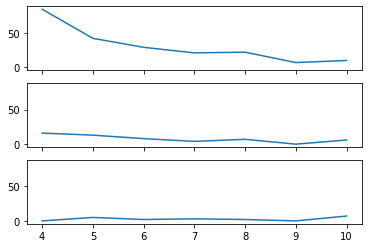

In [16]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [17]:
len(isomorphism_counter.counter)

180

Now to test how unique this behavior is via a random walk

4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:2498.0
Mean:3445.57
STD:3237.6170164335376
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:1264.5
Mean:1893.33
STD:1807.660610042715
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:747.5
Mean:1161.5
STD:1073.761337542007
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:718.0
Mean:944.71
STD:882.5551460956985
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:451.5
Mean:705.76
STD:745.217661089698
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:386.0
Mean:626.58
STD:689.2348537327462
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:444.0
Mean:664.75
STD:642.6093583974637


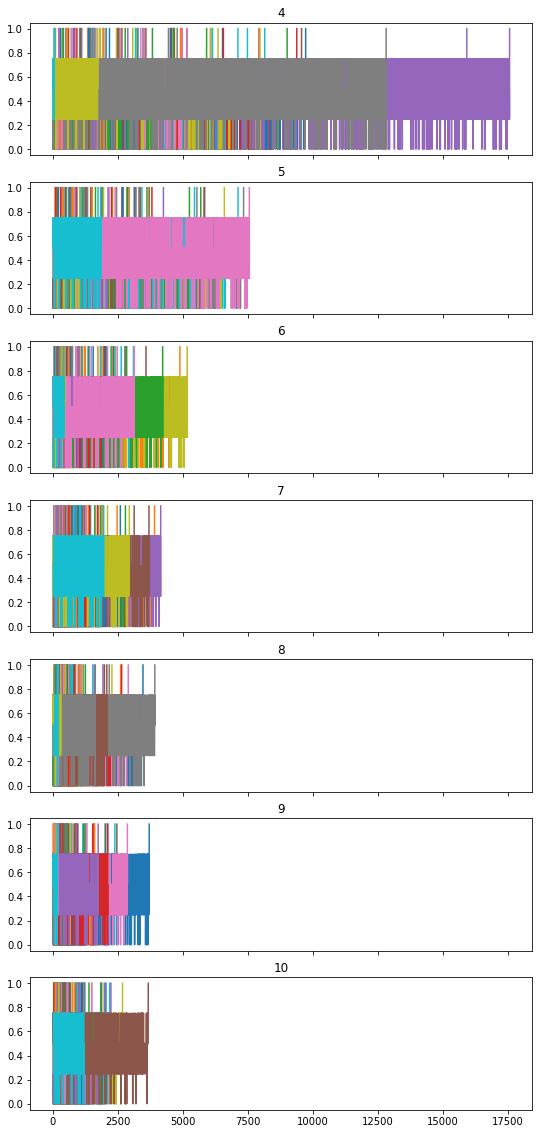

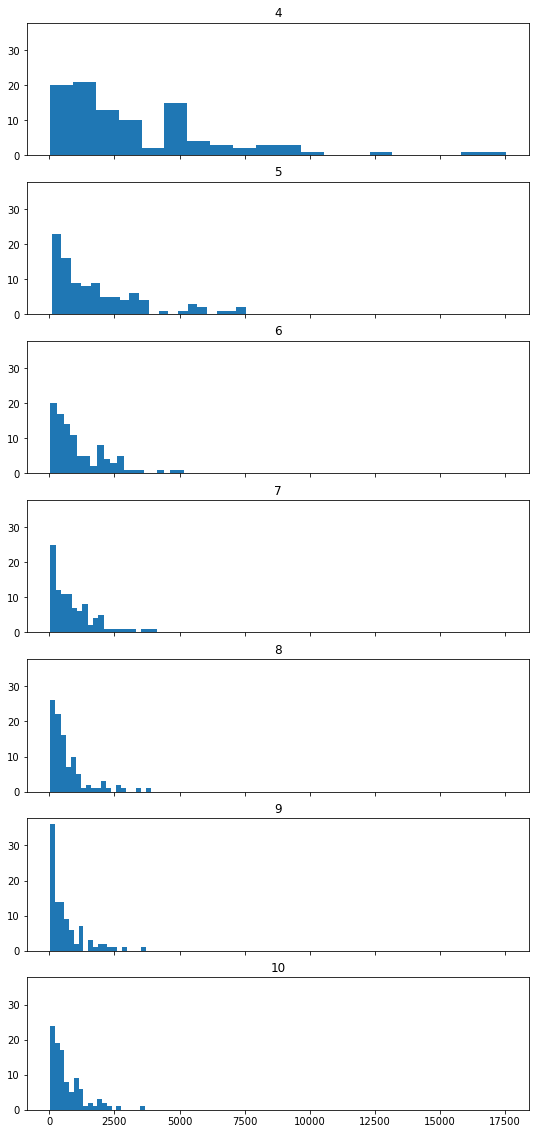

In [18]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

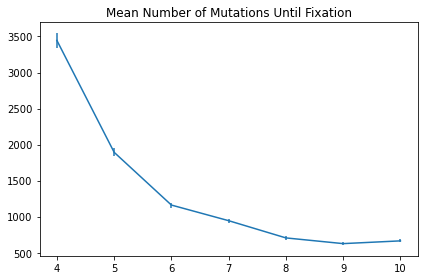

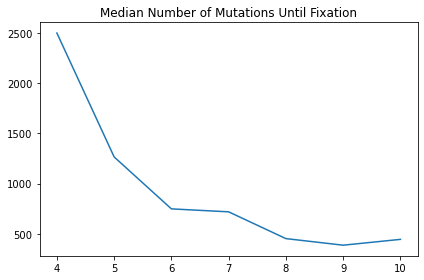

In [19]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Counter({'total': 231, '4 Random Walk': 79, '5 Random Walk': 55, '6 Random Walk': 34, '7 Random Walk': 24, '9 Random Walk': 15, '8 Random Walk': 14, '10 Random Walk': 10})


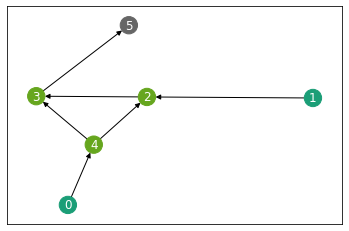

Counter({'total': 58, '4 Random Walk': 21, '5 Random Walk': 11, '6 Random Walk': 8, '7 Random Walk': 7, '9 Random Walk': 6, '8 Random Walk': 3, '10 Random Walk': 2})


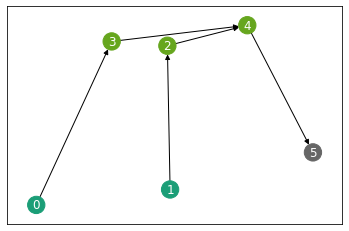

Counter({'total': 28, '5 Random Walk': 8, '7 Random Walk': 5, '10 Random Walk': 5, '6 Random Walk': 4, '9 Random Walk': 4, '8 Random Walk': 2})


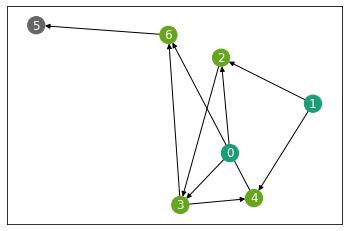

Counter({'total': 39, '6 Random Walk': 8, '5 Random Walk': 7, '7 Random Walk': 7, '8 Random Walk': 6, '9 Random Walk': 6, '10 Random Walk': 5})


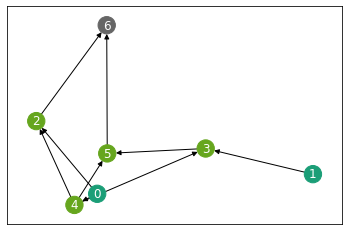

Counter({'total': 13, '5 Random Walk': 3, '7 Random Walk': 3, '9 Random Walk': 3, '8 Random Walk': 2, '10 Random Walk': 2})


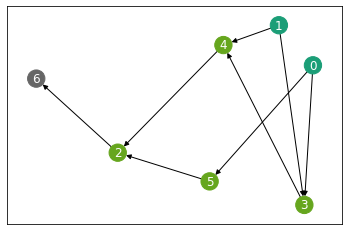

Counter({'total': 16, '7 Random Walk': 5, '8 Random Walk': 5, '5 Random Walk': 3, '6 Random Walk': 1, '9 Random Walk': 1, '10 Random Walk': 1})


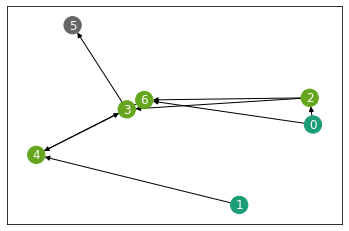

Counter({'total': 24, '7 Random Walk': 6, '6 Random Walk': 5, '5 Random Walk': 4, '8 Random Walk': 4, '9 Random Walk': 4, '10 Random Walk': 1})


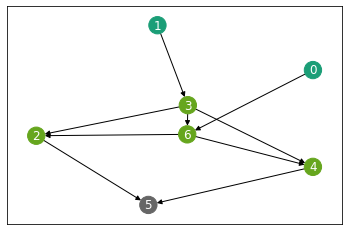

Counter({'total': 18, '6 Random Walk': 5, '5 Random Walk': 3, '7 Random Walk': 3, '9 Random Walk': 3, '8 Random Walk': 2, '10 Random Walk': 2})


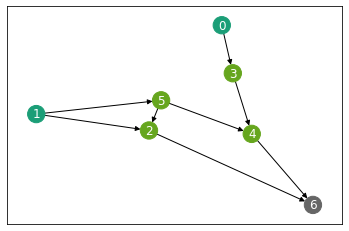

Counter({'total': 26, '6 Random Walk': 7, '7 Random Walk': 7, '10 Random Walk': 4, '5 Random Walk': 3, '8 Random Walk': 3, '9 Random Walk': 2})


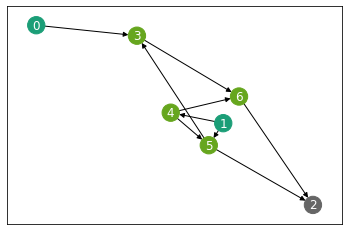

Counter({'total': 13, '10 Random Walk': 4, '7 Random Walk': 3, '5 Random Walk': 2, '6 Random Walk': 2, '8 Random Walk': 1, '9 Random Walk': 1})


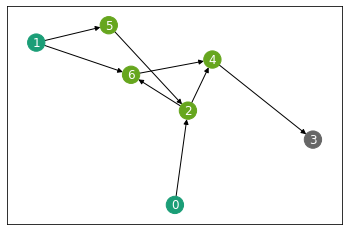

Counter({'total': 13, '6 Random Walk': 4, '8 Random Walk': 3, '7 Random Walk': 2, '9 Random Walk': 2, '5 Random Walk': 1, '10 Random Walk': 1})


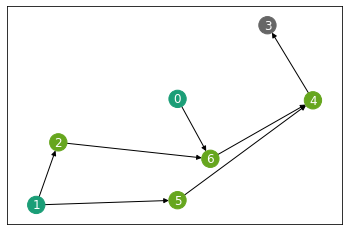

Counter({'total': 9, '6 Random Walk': 4, '8 Random Walk': 3, '7 Random Walk': 1, '9 Random Walk': 1})


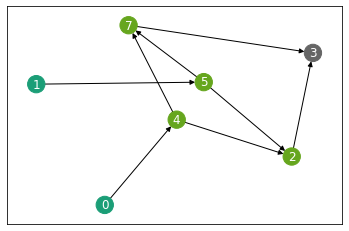

Counter({'total': 5, '6 Random Walk': 2, '10 Random Walk': 2, '8 Random Walk': 1})


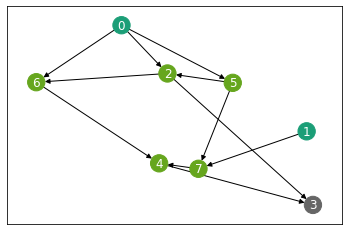

Counter({'total': 5, '9 Random Walk': 2, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1})


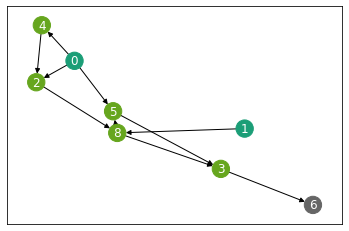

In [20]:
network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [21]:
list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

[[4, 1, 2, 4, 0, 0, 3, 3, 5],
 [1, 1, 0, 0, 3, 2, 4, 4, 5],
 [0, 1, 0, 2, 3, 1, 6, 6, 3, 4, 5],
 [4, 0, 1, 4, 0, 0, 4, 3, 2, 5, 6],
 [4, 5, 1, 0, 1, 3, 0, 0, 2, 2, 6]]

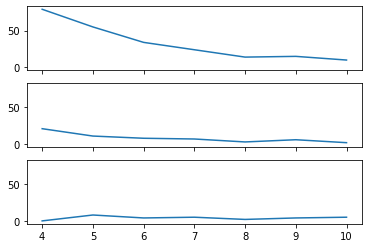

In [22]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])